<a href="https://colab.research.google.com/github/oxanaRC/CE888/blob/master/LAB3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [0]:

n_samples = 1500 # no.of.data points 

# The dataset function is avialable in sklearn package
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1) # Generate Moon Toy Dataset
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05) # Generate Circle Toy Dataset

# noisy_moons.shape
# moon_labels.shape

In [0]:

# Put in Array
noisy_moons=np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

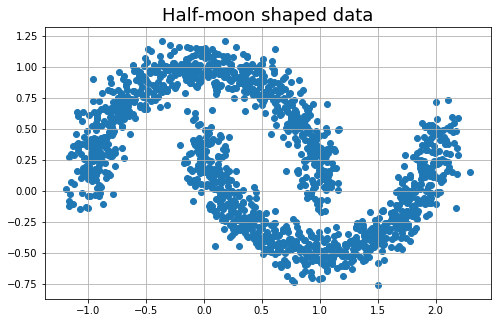

In [5]:

# Plot Half-moon data
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.savefig('HALF_MOON.png', dpi=300)
plt.show()

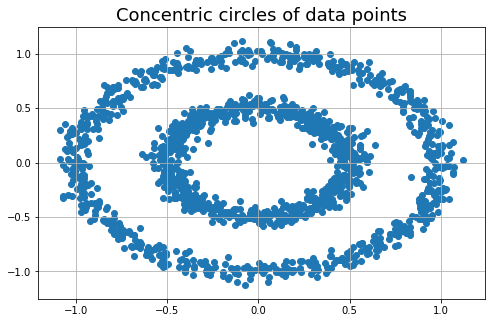

In [6]:

# Plot Circle data
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.savefig('CIRCLE.png', dpi=300)
plt.show()


K-Means Clustering¶
k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum K-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.


In [7]:
# Fit K-Means Clustering on noise moon data
km=cluster.KMeans(n_clusters=2)
km.fit(noisy_moons)
km.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [8]:
print("Completeness: %0.3f" % metrics.completeness_score(moon_labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(noisy_moons, km.labels_))

Completeness: 0.201
Silhouette Coefficient: 0.488


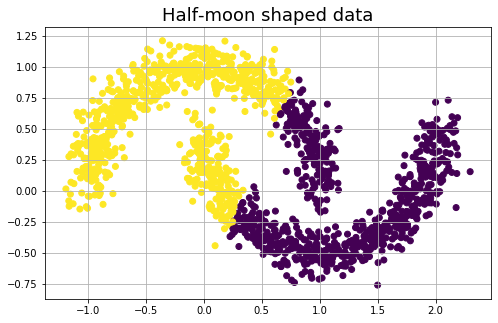

In [9]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
plt.savefig('CLUSTER_MOON.png', dpi=300)
plt.show()

In [10]:

# Fit K-Means Clustering on noise Circle data
km.fit(noisy_circles)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
print("Completeness: %0.3f" % metrics.completeness_score(circle_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_circles, km.labels_))

Completeness: 0.000
Silhouette Coefficient: 0.355


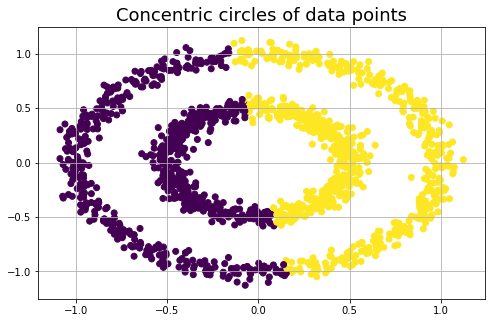

In [12]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
plt.savefig('CLUSTER_CIRCLE.png', dpi=300)
plt.show()


Disadvanatges of K-Means Clustering¶
1) Difficult to predict K-Value.
2) With global cluster, it didn't work well.
3) Different initial partitions can result in different final clusters.
DBSCAN
Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).


In [13]:
# Fit DBSCAN Clustering on noise moon data
dbs = cluster.DBSCAN(eps=0.1) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(noisy_moons)
dbs.labels_

array([0, 1, 1, ..., 0, 0, 1])

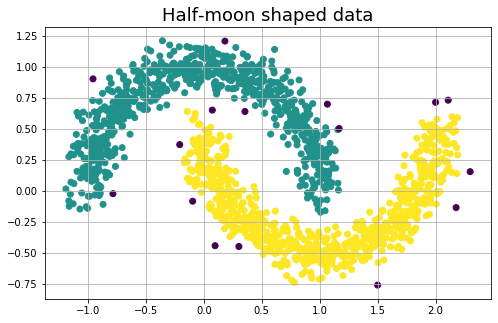

In [14]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
plt.savefig('DBSCAN_MOON.png', dpi=300)
plt.show()

In [15]:
# Fit DBSCAN Clustering on noise Circle data
dbs.fit(noisy_circles)
dbs.labels_

array([0, 0, 1, ..., 0, 0, 1])

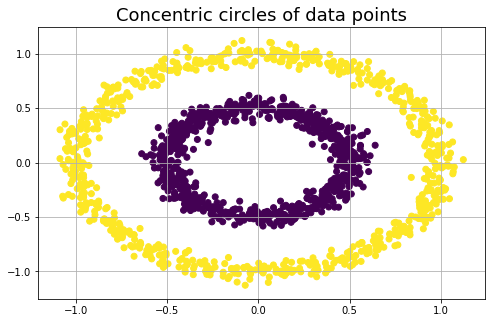

In [16]:

plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
plt.savefig('BSCAN_CIRCLE.png', dpi=300)
plt.show()

PCA on Moon Data


In [0]:

from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

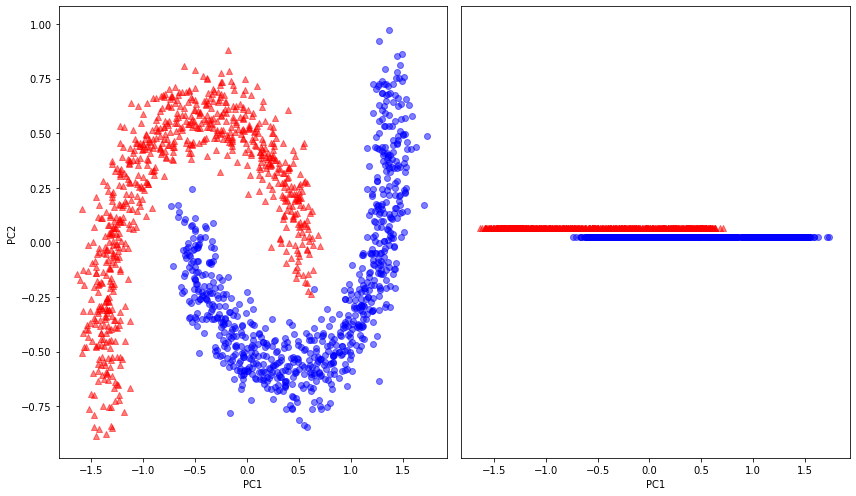

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax[0].scatter(noisy_moons_spca[moon_labels == 0, 0], noisy_moons_spca[moon_labels == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(noisy_moons_spca[moon_labels == 1, 0], noisy_moons_spca[moon_labels == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(noisy_moons_spca[moon_labels == 0, 0], np.zeros((750, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 1, 0], np.zeros((750, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.savefig('PCA_MOON.png', dpi=300)
plt.show()

          0         1
0  1.000000 -0.441879
1 -0.441879  1.000000


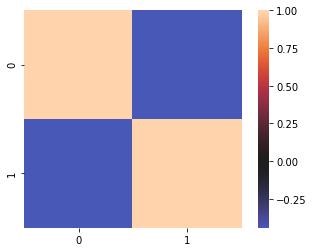

In [20]:
# Compute the correlation matrix before doing PCA
nm=pd.DataFrame(noisy_moons)
pca_corr=nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax=1, center=0, square=True)
plt.savefig('CORR_PCA.png', dpi=300)

              0             1
0  1.000000e+00 -4.248903e-17
1 -4.248903e-17  1.000000e+00


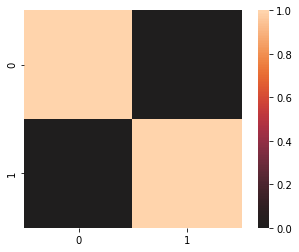

In [21]:
# Compute the correlation matrix after doing PCA
nmp=pd.DataFrame(noisy_moons_spca)
corr_pca=nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax=1, center=0, square=True)
plt.savefig('PCA_CORR.png', dpi=300)

In [0]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
noisy_moons_kpca = scikit_kpca.fit_transform(noisy_moons)

              0             1
0  1.000000e+00  3.778520e-16
1  3.778520e-16  1.000000e+00


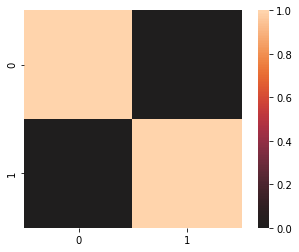

In [24]:
# Compute the correlation matrix after doing PCA

kmp=pd.DataFrame(noisy_moons_kpca)
corr_kpca=kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
plt.savefig('KPCA_CORR.png', dpi=300)

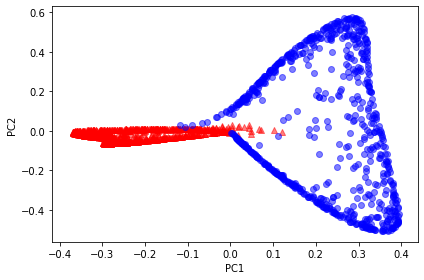

In [25]:
plt.scatter(noisy_moons_kpca[moon_labels == 0, 0], noisy_moons_kpca[moon_labels == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(noisy_moons_kpca[moon_labels == 1, 0], noisy_moons_kpca[moon_labels == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('KPCA_MOON.png', dpi=300)

Outlier detection


In [0]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


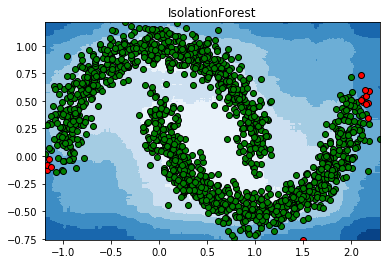

In [27]:

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500), np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_MOON.png', dpi=300)
print(pos.sum())
print(neg.sum())

In [0]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_circles)
y_pred_train = clf.predict(noisy_circles)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


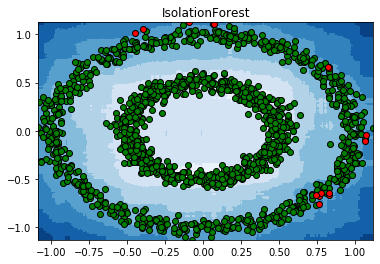

In [30]:

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_circles[:, 0])), max((noisy_circles[:, 0])), 500), 
                     np.linspace(min((noisy_circles[:, 1])), max((noisy_circles[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_circles[pos][:, 0], noisy_circles[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_circles[neg][:, 0], noisy_circles[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_CIRCLE.png', dpi=300)
print(pos.sum())
print(neg.sum())

Clustering and PCA on wine Dataset


In [31]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()
#df_wine.to_csv('WindeData.csv')

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
# Task 1:
# Check the counts of each wine class

In [32]:

# Fetch data into x and y variables
x=df_wine.ix[:,1:14] # Covariates or input
y=df_wine.ix[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Index(['Class label'], dtype='object')
